In [83]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
from scipy.integrate import quad, simps
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

__Задание 1__

__Задание 2__

Пусть $\xi \sim N(0, 1)$ и $\eta \sim \dfrac12 \bigg(N(\mu, 1) + N(-\mu, 1)\bigg)$. Будем считать, что складываются плотности, иначе смысла особо нет, так как пропадет зависимоть от $\mu$. 
$$
f(x) = \rho_\xi(x)\qquad g(x) = \rho_\eta(x)
$$

In [66]:
def make_f():
    def f(x):
        return norm.pdf(x, loc=0, scale=1)
    return f
    
def make_g(mu):
    def g(x):
        return (norm.pdf(x, loc=mu, scale=1) + norm.pdf(x, loc=-mu, scale=1)) / 2
    return g

In [67]:
def kl_distance(f, g, x):
    def integrate_function(x):
        return f(x) * (np.log(f(x)) - np.log(g(x)))
    return simps(integrate_function(x), x)

def chi2_distance(f, g, x):
    def integrate_function(x):
        return (f(x) - g(x))**2 / f(x)
    return simps(integrate_function(x), x)

def full_variation_distance(f, g, x):
    def integrate_function(x):
        return np.abs(f(x) - g(x)) / 2
    return simps(integrate_function(x), x)

In [68]:
x_density = np.linspace(-10, 10, 10000)
distances_f = [kl_distance, chi2_distance, full_variation_distance]
mus_x = np.linspace(-1, 1, 1000)
mus_y = np.zeros((len(distances_f), len(mus_x)))
for i, mu in tqdm(enumerate(mus)):
    f = make_f()
    g = make_g(mu)
    for k, f_dist in enumerate(distances_f):
        mus_y[k, i] = f_dist(f, g, x_density)

1000it [00:11, 88.84it/s]


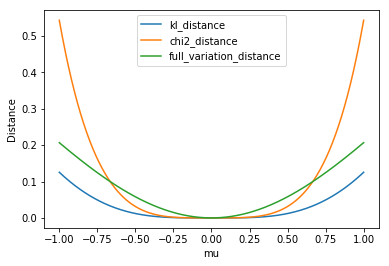

In [69]:
for i in range(len(distances_f)):
    plt.plot(mus_x, mus_y[i], label=distances_f[i].__name__)
plt.xlabel('mu')
plt.ylabel('Distance')
plt.legend()
plt.show()

__Задание 3__

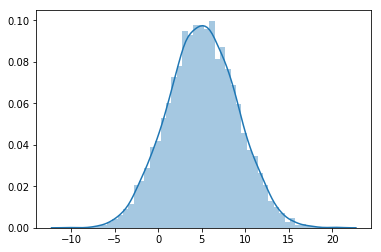

In [116]:
def g(x):
    return 1 - 1 / (1 + np.exp(x))

def g_derivative(x):
    return np.exp(x) / ((1 + np.exp(x))**2)

X = np.random.normal(loc=5, scale=4, size=10000)
sns.distplot(X)
plt.show()

Оценки дельта-методом

In [117]:
def delta(X):
    delta_mean = g(X).mean()
    delta_var = X.var() * g_derivative(X.mean())**2
    return (delta_mean, delta_var)
print(*delta(X))

0.8750114124535372 0.0006257463800630641


Оценки бутстрепом

In [118]:
def boot(X):
    boot_mean = 0
    boot_var = 0
    B = 100
    for i in range(B):
        samples = g(resample(X))
        boot_mean += samples.mean()
        boot_var += samples.var()
    boot_mean /= B
    boot_var /= B
    return (boot_mean, boot_var)
print(*boot(X))

0.87472357550559 0.06295030554022883


In [121]:
mus = np.linspace(-10, 10, 50)
sigmas = np.linspace(1, 10, 50)

Зафиксируем $\mu$ и построим график оценки от $\sigma^2$

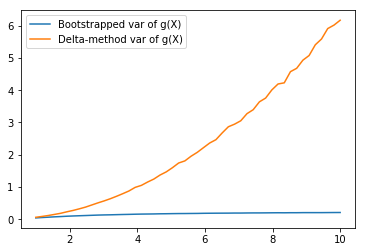

In [122]:
vars_boot = []
vars_delta = []
mu = 0
for sigma in sigmas:
    X = np.random.normal(loc=mu, scale=sigma, size=10000)
    vars_delta.append(delta(X)[1])
    vars_boot.append(boot(X)[1])
plt.plot(sigmas, vars_boot, label='Bootstrapped var of g(X)')
plt.plot(sigmas, vars_delta, label='Delta-method var of g(X)')
plt.legend()

Зафиксируем $\sigma$ и построим график дисперсии от $\mu$

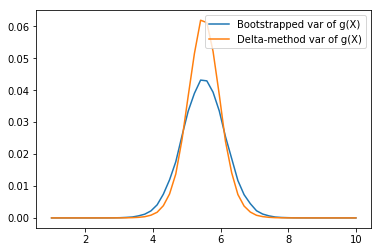

In [123]:
vars_boot = []
vars_delta = []
sigma = 1
for mu in mus:
    X = np.random.normal(loc=mu, scale=sigma, size=10000)
    vars_delta.append(delta(X)[1])
    vars_boot.append(boot(X)[1])
plt.plot(sigmas, vars_boot, label='Bootstrapped var of g(X)')
plt.plot(sigmas, vars_delta, label='Delta-method var of g(X)')
plt.legend()